# LP1 Data Analysis Project
## Indian Startup Data Analysis (2018-2021)

### 1. Business Understanding

The Indian startup data provides insights into the growth, funding patterns, success rates, employment impact, and challenges faced by startups in India. Analyzing this data helps identify emerging sectors, attractive regions, and investment trends. It also reveals opportunities to address societal and environmental challenges. Stakeholders can use this information for informed decision-making and support the thriving Indian startup ecosystem.

### Objective

Understanding the Indian startup ecosystem from previous data on funding and investors from **2018 to 2021**, and proposing to our team the best way to venture into the market.

### Hypothesis
**Null Hypothesis(Ho)** : No relationship between sector and amount raised(capital)

**Alternate Hypothesis(Ha)** : Some sectors receive more funding than others (relationship between the sector and amount raised)

### Research Questions

1. Which year has the highest amount of investment?

2. Which sector received the highest amount of funding collectively?

3. Which region has the most startups?

4. Which Region received the most investment

5. Which sector received the lowest amount of funding collectively?

6. What is the average amount of capital invested for the top 5 sectors?

7. Top 10 companies with highest amount invested

### Some Relevant Stakeholders

-   Startups

-   Investors

-   Government

-   Incubators and Startup Accelerators

-   Other Founders and Entrepreneurs

-   Customers

-   Competitors


#### 2. Data Understanding
Here, we explored and familiarized with the Indian startup data collected from 2018 to 2021. This involved examining the structure, quality, and content of the dataset. We further identified the relevant variables, data types, and potential issues, such as missing values or outliers.

## Installations

Packages for accessing remote database with data

In [331]:
# %pip install pyodbc  # Fix some structural errors
# %pip install python-dotenv 

Import other packages/libraries required for the project

In [332]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling

import pandas as pd
import numpy as np

# Data Visualisation

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

## Accessing 2020-2021 data from the database

-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

We already have our 2018 and 2019 data stored in csv files. We want to access the 2020 and 2021 data.

In [333]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER=tcp:{server};DATABASE={database};UID={username};PWD={password}"

In [334]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [335]:
# Get the cursor
cursor = connection.cursor()

# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')

# Fetch all the table names
tables = table_names.fetchall()

# Print the table names
for table in tables:
    print(table.table_name)

LP1_startup_funding2020
LP1_startup_funding2021
trace_xe_action_map
trace_xe_event_map


In [336]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP1_startup_funding2020"
data=pd.read_sql(query,connection)

In [337]:
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,"2,019.00",Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"200,000.00",None,None
1,Krayonnz,"2,019.00",Bangalore,EdTech,An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"100,000.00",Pre-seed,None
2,PadCare Labs,"2,018.00",Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,"2,020.00",New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","400,000.00",None,None
4,Gramophone,"2,016.00",Indore,AgriTech,Gramophone is an AgTech platform enabling access to agri inputs and powering efficient farm management.,"Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan","Siana Capital Management, Info Edge","340,000.00",None,None


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [339]:
# save to csv

data.to_csv('LP1_startup_funding2020.csv', index=False)

In [340]:
query = "SELECT * FROM LP1_startup_funding2021"
data_2=pd.read_sql(query,connection)

In [341]:
data_2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,"2,019.00",Bangalore,AI startup,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,"2,015.00",Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,"2,012.00",Mumbai,EdTech,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,"2,015.00",Mumbai,B2B E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,"2,021.00",Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [342]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [343]:
# save to csv

data_2.to_csv('LP1_startup_funding2021.csv', index=False)

In [344]:
data_3 = pd.read_csv('startup_funding2018.csv')
data_3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy farmers in rural Maharashtra.
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants to create a difference by selling globally.


In [345]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [346]:
data_4 = pd.read_csv('startup_funding2019.csv')
data_4.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,"2,014.00",Mumbai,Edtech,"A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students","Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,"2,014.00",Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ Labs","$30,000,000",Series D
4,Nu Genes,"2,004.00",Telangana,AgriTech,"It is a seed company engaged in production, processing and marketing of seeds",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [347]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


#### 3. Data Preparation
The data preparation phase is a critical step in our analysis of the Indian startup ecosystem data. In this phase, we focused on transforming and cleaning the raw data to make it suitable for analysis and modeling.

#### **3.1** Data cleaning

##### Issues with data
-  Columns from different years have different names that must be renamed to be the same
-  A year column must be added to all tables to represent the year of investment. This will be important once all tables are merged
-  Amount column needs to be standardized to the same currency ($), and converted to the same datatype (float). Symbols and commas should be dropped
-  Duplicate values in each table should be dropped
-  Missing values should be filled with an appropriate value for each column

#####  **3.1.1** 2018 Data Cleaning

In [348]:
data_df_2018 = pd.read_csv('startup_funding2018.csv')
data_df_2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specifically for small and medium businesses in India."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop software to service a range of industry requirements.
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [349]:
data_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [350]:
# Check for duplicates

data_df_2018.duplicated().sum()

1

In [351]:
# show all occurences of duplicated rows

data_df_2018[data_df_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and frolic of Colleges."


In [352]:
# Drop duplicates

data_df_2018.drop_duplicates(inplace = True)

In [353]:
#pd.set_option('display.max_rows', None)

In [354]:
data_df_2018['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [355]:
# Missing values in Industry Column

data_df_2018[data_df_2018['Industry'] == '—'].head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
58,MissMalini Entertainment,—,Seed,"₹104,000,000","Mumbai, Maharashtra, India","MissMalini Entertainment is a multi-platform new media network dedicated to Entertaining, Connecting & Empowering young Indians."
105,Jagaran Microfin,—,Debt Financing,"₹550,000,000","Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution which achieves a healthy amalgamation of social and financial
121,FLEECA,—,Seed,—,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.
146,WheelsEMI,—,Series B,"$14,000,000","Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI Pvt. Ltd."
153,Fric Bergen,—,Venture - Series Unknown,—,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food industry.


In [356]:
# Replace missing values with np.nan

data_df_2018['Industry']=data_df_2018['Industry'].replace('—',np.nan)

In [357]:
# we want to simplify the industry column
## Split values with a comma delimiter, select only the first element from the resulting list of substrings
## remove single quotes, since it is a string

data_df_2018['Industry'] = data_df_2018['Industry'].str.split(',').str[0].str.replace("'", "", regex=True)

In [358]:
data_df_2018['Industry'].sort_values()

139                           3D Printing
446                            Accounting
422                            Accounting
17                             Accounting
81                            Advertising
366                           Advertising
123                           Advertising
333                           Advertising
87                              Aerospace
421                             Aerospace
127                                AgTech
436                           Agriculture
302                           Agriculture
402                           Agriculture
293                           Agriculture
432                           Agriculture
25                            Agriculture
382                           Agriculture
1                             Agriculture
20                     Air Transportation
323                  Alternative Medicine
266                             Analytics
241                             Analytics
200                             An

In [359]:
pd.set_option("display.max_colwidth", None)
data_df_2018[data_df_2018['Industry'] == 'Android']

,Company Name,Industry,Round/Series,Amount,Location,About Company
265,edureka!,Android,Series A,2000000,"Bangalore, Karnataka, India","Edureka is the fastest growing online learning platform that offers live, instructor-led courses for professionals from various industries."


In [360]:
# Fix some structural errors (done through observation and individual inspection)

data_df_2018['Industry'].replace('Android','E-Learning',inplace =True)
data_df_2018['Industry'].replace('Wellness','Health Care',inplace =True)
data_df_2018['Industry'].replace('Basketball','Apps',inplace =True) 
data_df_2018['Industry'].replace('Catering','Food Delivery',inplace =True)
data_df_2018['Industry'].replace('Cooking','Food Delivery',inplace =True)
data_df_2018['Industry'].replace('Crowdsourcing','Crowdfunding',inplace =True)

In [362]:
# checking amount column for different values

data_df_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [363]:
# Missing values in Amount Column

data_df_2018[data_df_2018['Amount'] == '—'].head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants to create a difference by selling globally.
8,Freightwalla,Information Services,Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment application and point-of-sale device
10,BizCrum Infotech Pvt. Ltd.,B2B,Seed,—,"Delhi, Delhi, India",Building Transactionary B2B Marketplaces
11,Emojifi,Internet,Seed,—,"Bengaluru, Karnataka, India","Emojifi is an app that provides live emoji, stickers & GIFs suggestions based on the typed words across chat platforms."


In [364]:
# Replace Values

data_df_2018['Amount'].replace("—", np.nan, inplace = True, regex=True)
data_df_2018['Amount'].replace("[,$]", "", inplace = True, regex=True)

In [365]:
# we must convert rupees to dollars
## create new columns to store INR values and $ values
## rsplit the 'Amount' using '₹' as the delimiter. We only want values with'₹' from the right.
data_df_2018['Amount (₹)'] = data_df_2018['Amount'].str.rsplit('₹', n = 2).str[1]

# Convert to float and fill any missing (NaN) values wit 0
data_df_2018['Amount (₹)'] = data_df_2018['Amount (₹)'].apply(float).fillna(0)

# Convert the INR values to USD
data_df_2018['Amount ($)'] = data_df_2018['Amount (₹)'] * 0.0146 # Average exchange rate in 2018


In [366]:
data_df_2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Amount (₹),Amount ($)
521,Udaan,B2B,Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specifically for small and medium businesses in India.",0.00,0.00
522,Happyeasygo Group,Tourism,Series A,NaN,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,0.00,0.00
523,Mombay,Food and Beverage,Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.,0.00,0.00
524,Droni Tech,Information Technology,Seed,₹35000000,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop software to service a range of industry requirements.,"35,000,000.00","511,000.00"
525,Netmeds,Biotechnology,Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!,0.00,0.00


In [367]:
# Replace 0 values with np.nan in the converted rupee values
data_df_2018['Amount ($)'] = data_df_2018['Amount ($)'].replace(0, np.nan)

# Fill nan values in USD amount column with values in Amount column
data_df_2018['Amount ($)'] = data_df_2018['Amount ($)'].fillna(data_df_2018['Amount'])

# drop Amount column and INR column
data_df_2018.drop(['Amount','Amount (₹)'], axis = 1, inplace = True)


In [369]:
data_df_2018['Amount ($)'].unique()

array(['250000', 584000.0, 949000.0, '2000000', nan, '1600000', 233600.0,
       730000.0, 1460000.0, '150000', '1100000', 7300.0, '6000000',
       '650000', 511000.0, 934400.0, 292000.0, '1000000', '5000000',
       '4000000', 438000.0, '2800000', '1700000', '1300000', 73000.0,
       182500.0, 219000.0, '500000', 1518400.0, 657000.0, '13400000',
       365000.0, 385440.0, 116800.0, 876.0, '9000000', '100000', '20000',
       '120000', 496400.0, 4993200.0, '143145', 8760000.0, '742000000',
       14600000.0, 29200000.0, '3980000', '10000', 1460.0, 3650000.0,
       '1000000000', '7000000', '35000000', 8030000.0, '28500000',
       3504000.0, 1752000.0, '2400000', '30000000', 36500000.0,
       '23000000', '11000000', 642400.0, '3240000', 876000.0, '540000000',
       9490000.0, 23360000.0, '900000', '10000000', '1500000', 1022000.0,
       '14000000', 1496500.0, '100000000', 17520.0, 75920000.0, '800000',
       '1041000', '15000', '1400000', '1200000', '2200000', '1800000',
       '

In [370]:
data_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       495 non-null    object
 2   Round/Series   525 non-null    object
 3   Location       525 non-null    object
 4   About Company  525 non-null    object
 5   Amount ($)     377 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB


In [371]:
# add a year column

data_df_2018['Year'] = 2018

In [372]:
data_df_2018['Location'].value_counts()

Location
Bangalore, Karnataka, India         101
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

In [373]:
# we want to simplify the location column
## Split values with a comma delimiter, select only the first element from the resulting list of substrings
## remove single quotes, since it is a string


data_df_2018['Location'] = data_df_2018['Location'].str.split(',').str[0].replace("'","",regex=True)

In [374]:
data_df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [375]:
#replace missing/unkown values with np.nan

data_df_2018['Round/Series']=data_df_2018['Round/Series'].replace('Venture - Series Unknown',np.nan)
data_df_2018['Round/Series']=data_df_2018['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.nan)
data_df_2018['Round/Series']=data_df_2018['Round/Series'].replace('Undisclosed',np.nan)


In [376]:
# Rename Columns to match other Data tables
data_df_2018.rename(columns = {'Company Name': 'Company/Brand', 'Industry': 'Sector', 
                               'Round/Series':'Stage', 'Location': 'HeadQuarter', 'About Company':'What it does', 'Amount ($)': 'Amount($)'}, inplace=True)
data_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  525 non-null    object
 1   Sector         495 non-null    object
 2   Stage          485 non-null    object
 3   HeadQuarter    525 non-null    object
 4   What it does   525 non-null    object
 5   Amount($)      377 non-null    object
 6   Year           525 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.8+ KB


##### **3.1.2** 2019 Data Cleaning

In [377]:
data_df_2019 = pd.read_csv('startup_funding2019.csv')
data_df_2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,"It connects client requirements to their supply chain infrastructure for ease of ordering, tracking and manufacturing","Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Partners, Dhruv Agarwala","$20,000,000",Series A
85,Oyo,"2,013.00",Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, SoftBank","$693,000,000",NaN
86,GoMechanic,"2,016.00",Delhi,Automobile & Technology,Find automobile repair and maintenance service providers,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh Karwa",Sequoia Capital,"$5,000,000",Series B
87,Spinny,"2,015.00",Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta","Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [378]:
data_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [379]:
# check duplicates

data_df_2019.duplicated().sum()

0

In [380]:
# drop unwanted columns (columns not present in 2018 dataset)

data_df_2019.drop(['Founded', 'Founders', 'Investor'], axis = 1, inplace = True)


In [381]:
# add year column

data_df_2019['Year']=2019

In [382]:
data_df_2019['Amount($)'].value_counts()

Amount($)
Undisclosed     12
$5,000,000       6
$1,500,000       4
$6,000,000       4
$1,000,000       4
$30,000,000      3
$20,000,000      3
$50,000,000      3
$4,000,000       3
$5,500,000       3
$26,000,000      2
$2,000,000       2
$12,000,000      2
$100,000         2
$5,700,000       1
$693,000,000     1
$4,800,000       1
$120,000,000     1
$311,000,000     1
$6,800,000       1
$36,000,000      1
$2,800,000       1
$220,000         1
$600,000         1
$7,000,000       1
$2,100,000       1
$70,000,000      1
$60,000,000      1
$8,000,000       1
$25,000,000      1
$6,300,000       1
$100,000,000     1
$11,000,000      1
$28,000,000      1
$275,000,000     1
$22,000,000      1
$140,500         1
$540,000,000     1
$15,000,000      1
$182,700         1
$15,500,000      1
$400,000         1
$2,500,000       1
$140,000         1
$230,000,000     1
$49,400,000      1
$32,000,000      1
$150,000,000     1
$150,000         1
$33,000,000      1
Name: count, dtype: int64

In [383]:
# Replace values

data_df_2019['Amount($)'].replace('Undisclosed', np.nan, inplace = True, regex=True)
data_df_2019['Amount($)'].replace("[,$]", "", inplace = True, regex=True)

In [384]:
data_df_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [386]:
data_df_2019['Sector'].value_counts()

Sector
Edtech                          7
Fintech                         5
AgriTech                        4
Technology                      4
SaaS                            4
Automobile                      3
E-commerce                      3
Logistics                       3
Food                            2
Foodtech                        2
Accomodation                    2
Automotive tech                 2
IoT                             2
AI                              2
E-marketplace                   2
Ecommerce                       1
Cybersecurity                   1
Mutual Funds                    1
Food & tech                     1
Legal tech                      1
Sports                          1
B2B Supply Chain                1
Healthtech                      1
Yoga & wellness                 1
Virtual Banking                 1
Transportation                  1
Transport & Rentals             1
Marketing & Customer loyalty    1
Infratech                       1
Hospita

In [388]:
# Fix some structural errors (done through observation and individual inspection)

data_df_2018['Sector'].replace('Ecommerce','E-commerce',inplace =True)
data_df_2018['Sector'].replace('Food & tech','Foodtech',inplace =True)
data_df_2018['Sector'].replace('Food tech','Foodtech',inplace =True)

In [389]:
data_df_2019['Stage'].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [391]:
# Fix some structural errors 

data_df_2018['Stage'].replace('Pre-series A','Pre series A',inplace =True)
data_df_2018['Stage'].replace('Seed fund','Seed',inplace =True)
data_df_2018['Stage'].replace('Seed funding','Seed',inplace =True)
data_df_2018['Stage'].replace('Seed round','Seed',inplace =True)

In [392]:
#Merge 2018 and 2019 Data

data_new = pd.concat([data_df_2018, data_df_2019], ignore_index=True)
data_new.tail()

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
609,Infra.Market,Infratech,Series A,Mumbai,"It connects client requirements to their supply chain infrastructure for ease of ordering, tracking and manufacturing",20000000,2019
610,Oyo,Hospitality,NaN,Gurugram,Provides rooms for comfortable stay,693000000,2019
611,GoMechanic,Automobile & Technology,Series B,Delhi,Find automobile repair and maintenance service providers,5000000,2019
612,Spinny,Automobile,NaN,Delhi,Online car retailer,50000000,2019
613,Ess Kay Fincorp,Banking,NaN,Rajasthan,Organised Non-Banking Finance Company,33000000,2019


In [393]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  614 non-null    object
 1   Sector         579 non-null    object
 2   Stage          528 non-null    object
 3   HeadQuarter    595 non-null    object
 4   What it does   614 non-null    object
 5   Amount($)      454 non-null    object
 6   Year           614 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 33.7+ KB


##### **3.1.3** 2020 Data Cleaning

In [394]:
data_df_2020 = pd.read_csv('LP1_startup_funding2020.csv')
data_df_2020.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career guidance,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","1,500,000.00",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface for all their financial and banking mandates,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","13,200,000.00",Seed Round,NaN
1052,Purplle,"2,012.00",Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"8,000,000.00",NaN,NaN
1053,Shuttl,"2,015.00",Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"8,043,000.00",Series C,NaN
1054,Pando,"2,017.00",Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,"9,000,000.00",Series A,NaN


In [395]:
data_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [396]:
# check duplicates

data_df_2020.duplicated().sum()

3

In [397]:
# show all occurences of duplicated rows

data_df_2020[data_df_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,"2,012.00",Mumbai,Cosmetics,Nykaa is an online marketplace for different beauty and wellness products.,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,NaN,NaN
129,Krimanshi,"2,015.00",Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by improving the productivity of Indian cattle with better quality feed.,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City","600,000.00",Seed,NaN
145,Krimanshi,"2,015.00",Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by improving the productivity of Indian cattle with better quality feed.,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City","600,000.00",Seed,NaN
205,Nykaa,"2,012.00",Mumbai,Cosmetics,Nykaa is an online marketplace for different beauty and wellness products.,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,NaN,NaN
326,Byju’s,"2,011.00",Bangalore,EdTech,An Indian educational technology and online tutoring firm,Byju Raveendran,"Owl Ventures, Tiger Global Management","500,000,000.00",NaN,NaN
362,Byju’s,"2,011.00",Bangalore,EdTech,An Indian educational technology and online tutoring firm,Byju Raveendran,"Owl Ventures, Tiger Global Management","500,000,000.00",NaN,NaN


In [398]:
# Drop duplicates

data_df_2020.drop_duplicates(inplace = True)

In [399]:
# drop columns

data_df_2020.drop(['Founded', 'Founders', 'Investor', 'column10'], axis=1, inplace=True)

In [400]:
# add year column

data_df_2020['Year']=2020

In [401]:
# Rename Columns to match other Data
data_df_2020.rename(columns = {'Company_Brand': 'Company/Brand', 'What_it_does': 'What it does',
                                'Amount': 'Amount($)'}, inplace=True)

In [402]:
data_df_2020['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                                                   316
Mumbai                                                      164
Gurugram                                                     79
Delhi                                                        62
Chennai                                                      43
New Delhi                                                    36
Pune                                                         36
Noida                                                        32
Hyderabad                                                    25
Gurgaon                                                      21
Ahmedabad                                                    11
Kolkata                                                      11
Haryana                                                      10
Indore                                                        8
Jaipur                                                        6
Kochi                       

In [403]:
# we want to simplify some of the values the HeadQuarter column
## Split values with a comma delimiter; select only the first element from the resulting list of substrings
## remove single quotes, since it is a string

data_df_2020['HeadQuarter'] = data_df_2020['HeadQuarter'].str.split(',').str[0].str.replace("'", "", regex=True)

In [404]:
# Fix some structural errors

data_df_2020['HeadQuarter'].replace('Hyderebad','Hyderabad',inplace =True)
data_df_2020['HeadQuarter'].replace('San Francisco Bay Area',
                                    'San Francisco',inplace =True)
data_df_2020['HeadQuarter'].replace('San Franciscao','San Francisco',inplace =True)
data_df_2020['HeadQuarter'].replace('Banglore','Bangalore',inplace =True)
data_df_2020['HeadQuarter'].replace('Hyderebad','Hyderabad',inplace =True)

In [405]:
data_df_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [406]:
data_df_2020[data_df_2020['Sector'] == 'Supply chain, Agritech']

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
705,Intello Labs,Gurugram,"Supply chain, Agritech",Standardisation and Quality control of fruits & vegetables,"5,900,000.00",Series A,2020


In [407]:
# Fix some structural errors (manual observation)

data_df_2020['Sector'].replace('AI startup','AI',inplace =True)
data_df_2020['Sector'].replace('AI Startup','AI',inplace =True)
data_df_2020['Sector'].replace('AI Company','AI',inplace =True)
data_df_2020['Sector'].replace('AR/VR startup','AR/VR',inplace =True)
data_df_2020['Sector'].replace('Agri tech','AgriTech',inplace =True)
data_df_2020['Sector'].replace('Agritech','AgriTech',inplace =True)
data_df_2020['Sector'].replace('Agritech startup','AgriTech',inplace =True)
data_df_2020['Sector'].replace('Agritech/Commerce','AgriTech',inplace =True)
data_df_2020['Sector'].replace('Automobiles','Automobile',inplace =True)
data_df_2020['Sector'].replace('Automotive Startup','Automotive company',inplace =True)
data_df_2020['Sector'].replace('Beverages','Beverage',inplace =True)
data_df_2020['Sector'].replace('Biotechnology company','Biotech',inplace =True)
data_df_2020['Sector'].replace('Blockchain startup','Blockchain',inplace =True)
data_df_2020['Sector'].replace('Co-working Startup','Co-working',inplace =True)
data_df_2020['Sector'].replace('Coworking','Co-working',inplace =True)
data_df_2020['Sector'].replace('Content marketplace','Content Marktplace',inplace =True)
data_df_2020['Sector'].replace('Deep Tech','Deeptech',inplace =True)
data_df_2020['Sector'].replace('EV','EV startup',inplace =True)
data_df_2020['Sector'].replace('Ecommerce','E-commerce',inplace =True)
data_df_2020['Sector'].replace('EdTech Startup','EdTech',inplace =True)
data_df_2020['Sector'].replace('EdtTech','EdTech',inplace =True)
data_df_2020['Sector'].replace('Edtech','EdTech',inplace =True)
data_df_2020['Sector'].replace('Fintech','FinTech',inplace =True)
data_df_2020['Sector'].replace('Food devlivery','Food delivery',inplace =True)
data_df_2020['Sector'].replace('Food diet','FoodTech',inplace =True)
data_df_2020['Sector'].replace('Food tech','FoodTech',inplace =True)
data_df_2020['Sector'].replace('Foodtech','FoodTech',inplace =True)
data_df_2020['Sector'].replace('HR tech','HR Tech',inplace =True)
data_df_2020['Sector'].replace('HR Tech startup','HR Tech',inplace =True)
data_df_2020['Sector'].replace('Healthtech','HealthTech',inplace =True)
data_df_2020['Sector'].replace('HeathTech','HealthTech',inplace =True)
data_df_2020['Sector'].replace('Insurtech','InsureTech',inplace =True)
data_df_2020['Sector'].replace('Insurance technology','InsureTech',inplace =True)
data_df_2020['Sector'].replace('IoT startup','IoT',inplace =True)
data_df_2020['Sector'].replace('Nutrition tech','Nutrition Tech',inplace =True)
data_df_2020['Sector'].replace('Reatil startup','Retail startup',inplace =True)
data_df_2020['Sector'].replace('SaaS startup','SaaS',inplace =True)
data_df_2020['Sector'].replace('SaaS  startup','SaaS',inplace =True)
data_df_2020['Sector'].replace('Sles and marketing','Sales and marketing',inplace =True)
data_df_2020['Sector'].replace('Social media','Social Media',inplace =True)
data_df_2020['Sector'].replace('Software company','Software Company',inplace =True)
data_df_2020['Sector'].replace('Solar solution','Solar Solution',inplace =True)
data_df_2020['Sector'].replace('Spacetech','SpaceTech',inplace =True)
data_df_2020['Sector'].replace('Supply chain, Agritech','Supply chain',inplace =True)
data_df_2020['Sector'].replace('Tech company','Tech Startup',inplace =True)
data_df_2020['Sector'].replace('Travel tech','TravelTech',inplace =True)

In [408]:
# values in amount column

data_df_2020['Amount($)'] = data_df_2020['Amount($)'].astype(str)
data_df_2020['Amount($)'].unique()

array(['200000.0', '100000.0', 'nan', '400000.0', '340000.0', '600000.0',
       '45000000.0', '1000000.0', '2000000.0', '1200000.0', '660000000.0',
       '120000.0', '7500000.0', '5000000.0', '500000.0', '3000000.0',
       '10000000.0', '145000000.0', '100000000.0', '21000000.0',
       '4000000.0', '20000000.0', '560000.0', '275000.0', '4500000.0',
       '15000000.0', '390000000.0', '7000000.0', '5100000.0',
       '700000000.0', '2300000.0', '700000.0', '19000000.0', '9000000.0',
       '40000000.0', '750000.0', '1500000.0', '7800000.0', '50000000.0',
       '80000000.0', '30000000.0', '1700000.0', '2500000.0', '40000.0',
       '33000000.0', '35000000.0', '300000.0', '25000000.0', '3500000.0',
       '200000000.0', '6000000.0', '1300000.0', '4100000.0', '575000.0',
       '800000.0', '28000000.0', '18000000.0', '3200000.0', '900000.0',
       '250000.0', '4700000.0', '75000000.0', '8000000.0', '121000000.0',
       '55000000.0', '3300000.0', '11000000.0', '16000000.0', '5400000.

In [409]:
data_df_2020["Amount($)"].replace("nan", np.nan, inplace = True, regex=True)

In [410]:
data_df_2020['Stage'].unique()

array([nan, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [412]:
# Fix some structural errors 

data_df_2020['Stage'].replace('Bridge Round','Bridge',inplace =True)
data_df_2020['Stage'].replace('Pre seed round','Pre seed Round',inplace =True)
data_df_2020['Stage'].replace('Pre series A','Pre Series A',inplace =True)
data_df_2020['Stage'].replace('Pre- series A','Pre Series A',inplace =True)
data_df_2020['Stage'].replace('Pre-seed','Pre-Seed',inplace =True)
data_df_2020['Stage'].replace('Pre-series A','Pre Series A',inplace =True)
data_df_2020['Stage'].replace('Pre series B','Pre Series B',inplace =True)
data_df_2020['Stage'].replace('Pre-Series B','Pre Series B',inplace =True)
data_df_2020['Stage'].replace('Pre-series B','Pre Series B',inplace =True)
data_df_2020['Stage'].replace('Pre series C','Pre Series C',inplace =True)
data_df_2020['Stage'].replace('Pre-series C','Pre Series C',inplace =True)
data_df_2020['Stage'].replace('Seed A','Seed',inplace =True)
data_df_2020['Stage'].replace('Seed Funding','Seed',inplace =True)
data_df_2020['Stage'].replace('Seed Round','Seed',inplace =True)
data_df_2020['Stage'].replace('Seed round','Seed',inplace =True)
data_df_2020['Stage'].replace('Seed funding','Seed',inplace =True)
data_df_2020['Stage'].replace('Seed Investment','Seed',inplace =True)

In [413]:
data_df_2020['Stage'].unique()

array([nan, 'Pre-Seed', 'Seed', 'Pre Series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre Series C', 'Pre Series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F', 'Edge',
       'Series H', 'Series A-1', 'Seed & Series A', 'Pre seed Round',
       'Angel Round', 'Pre Series A1', 'Series E2', 'Series D1',
       'Mid series', 'Series C, D'], dtype=object)

In [414]:
data_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1052 non-null   object
 1   HeadQuarter    958 non-null    object
 2   Sector         1039 non-null   object
 3   What it does   1052 non-null   object
 4   Amount($)      799 non-null    object
 5   Stage          590 non-null    object
 6   Year           1052 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 65.8+ KB


##### **3.1.4** 2021 Data Cleaning

In [415]:
data_df_2021 = pd.read_csv('LP1_startup_funding2021.csv')
data_df_2021.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1204,Gigforce,"2,019.00",Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,"2,015.00",New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically integrated online-first tea brands.,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,"2,019.00",Bangalore,Financial Services,International education loans for high potential students.,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,"2,015.00",Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,"2,019.00",Bangalore,Financial Services,India’s first socially distributed full stack financial services platform for small town India,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [416]:
data_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [417]:
data_df_2021.duplicated().sum()

19

In [418]:
# show all occurences of duplicated rows

data_df_2021[data_df_2021.duplicated]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,"2,020.00",Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed juices produced in Edinburgh. Currently distributing wholesale within the Edinburgh region.,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,NaN
109,Bewakoof,"2,012.00",Mumbai,Apparel & Fashion,"Bewakoof is a lifestyle fashion brand that makes creative, distinctive fashion for the trendy, contemporary Indian.",Prabhkiran Singh,InvestCorp,$8000000,NaN
111,FanPlay,"2,020.00",Computer Games,Computer Games,A real money game app specializing in trivia games,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,"2,014.00",Mumbai,HRTech,"Advantage Club is India's largest employee engagement platform, Provide end to end employee benefit management with state of the art products like:","Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,NaN
119,Ruptok,"2,020.00",New Delhi,FinTech,"Ruptok fintech Pvt. Ltd. is an online gold loan service provider , with attractive interests rate .",Ankur Gupta,Eclear Leasing,$1000000,NaN
243,Trinkerr,"2,021.00",Bangalore,Capital Markets,Trinkerr is India's first social trading platform.,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,"2,021.00",Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,"2,021.00",Bangalore,Automotive,Create and Inspire the future of sustainable urban transportation through Accelerated Innovation.,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,"2,009.00",Hyderabad,Hospital & Health Care,"A vision and passion of redefining healthcare delivery in India in 2010, NephroPlus today is India’s largest network of dialysis centres.",Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,"2,020.00",Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [419]:
# Drop duplicates

data_df_2021.drop_duplicates(inplace = True)

In [420]:
#drop columns

data_df_2021.drop(['Founded', 'Founders', 'Investor'], axis=1, inplace=True)

In [421]:
# add year column

data_df_2021['Year']=2021

In [422]:
data_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1190 non-null   object
 1   HeadQuarter    1189 non-null   object
 2   Sector         1190 non-null   object
 3   What_it_does   1190 non-null   object
 4   Amount         1187 non-null   object
 5   Stage          769 non-null    object
 6   Year           1190 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 74.4+ KB


In [423]:
data_df_2021['HeadQuarter'].value_counts()

HeadQuarter
Bangalore                            421
Mumbai                               198
Gurugram                             154
New Delhi                            142
Pune                                  46
Chennai                               40
Noida                                 34
Hyderabad                             32
Jaipur                                11
Ahmedabad                             11
Thane                                  7
Gurgaon                                7
Ahmadabad                              6
Kolkata                                5
Chandigarh                             5
Haryana                                4
Gujarat                                3
Lucknow                                3
Coimbatore                             3
Ghaziabad                              2
Indore                                 2
Cochin                                 2
Faridabad, Haryana                     2
Surat                                  2
Goa 

In [424]:
data_df_2021[data_df_2021['HeadQuarter']=='Online Media\t#REF!']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
1100,Sochcast,Online Media\t#REF!,Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience,"CA Harvinderjit Singh Bhatia, Garima Surana, Anil Srivatsa",NaN,NaN,2021


In [425]:
data_df_2021[data_df_2021['HeadQuarter']=='Information Technology & Services']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
1176,Peak,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put the power of AI at the center of all commercial decision making with Decision Intelligence,$75000000,Series C,2021


In [426]:
data_df_2021[data_df_2021['HeadQuarter']=='Computer Games']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
98,FanPlay,Computer Games,Computer Games,A real money game app specializing in trivia games,Upsparks,$1200000,2021


In [427]:
data_df_2021[data_df_2021['HeadQuarter']=='Food & Beverages']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
241,MasterChow,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,$461000,Seed,2021


In [428]:
data_df_2021[data_df_2021['HeadQuarter']=='Pharmaceuticals\t#REF!']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
242,Fullife Healthcare,Pharmaceuticals\t#REF!,Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.,Varun Khanna,Series C,NaN,2021


In [429]:
# Fix some structural errors

data_df_2021['HeadQuarter'].replace('Faridabad, Haryana','Faridabad',inplace =True)
data_df_2021['HeadQuarter'].replace('Mountain View, CA','California',inplace =True) 
data_df_2021['HeadQuarter'].replace('Online Media\t#REF!',np.nan,inplace =True)
data_df_2021['HeadQuarter'].replace('Information Technology & Services','Manchester',inplace =True)
data_df_2021['HeadQuarter'].replace('Small Towns, Andhra Pradesh','Andhra Pradesh',inplace =True)
data_df_2021['HeadQuarter'].replace('Computer Games',np.nan,inplace =True)
data_df_2021['HeadQuarter'].replace('Food & Beverages',np.nan,inplace =True)
data_df_2021['HeadQuarter'].replace('Pharmaceuticals\t#REF!',np.nan,inplace =True)
data_df_2021['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True)

In [430]:
data_df_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [431]:
# Fix some structural errors

data_df_2021['Sector'].replace('AI company','AI',inplace =True)
data_df_2021['Sector'].replace('AI startup','AI',inplace =True)
data_df_2021['Sector'].replace('AR startup','AR',inplace =True)
data_df_2021['Sector'].replace('Augmented reality','AR',inplace =True)
data_df_2021['Sector'].replace('B2B Ecommerce','B2B E-commerce',inplace =True)
data_df_2021['Sector'].replace('B2B marketplace','B2B Marketplace',inplace =True)
data_df_2021['Sector'].replace('B2B startup','B2B',inplace =True)
data_df_2021['Sector'].replace('Biotechnology','BioTechnology',inplace =True)
data_df_2021['Sector'].replace('Blockchain startup','Blockchain',inplace =True)
data_df_2021['Sector'].replace('Computer software','Computer Software',inplace =True)
data_df_2021['Sector'].replace('Consumer goods','Consumer Goods',inplace =True)
data_df_2021['Sector'].replace('Consumer service','Consumer Services',inplace =True)
data_df_2021['Sector'].replace('Cryptocurrency','Crypto',inplace =True)
data_df_2021['Sector'].replace('D2C Business','D2C',inplace =True)
data_df_2021['Sector'].replace('D2C startup','D2C',inplace =True)
data_df_2021['Sector'].replace('Deep Tech','Deeptech',inplace =True)
data_df_2021['Sector'].replace('EV startup','EV',inplace =True)
data_df_2021['Sector'].replace('Environmental service','Environmental Services',inplace =True)
data_df_2021['Sector'].replace('Fashion and lifestyle','Fashion & Lifestyle',inplace =True)
data_df_2021['Sector'].replace('Femtech','FemTech',inplace =True)
data_df_2021['Sector'].replace('Food and Beverages','Food & Beverages',inplace =True)
data_df_2021['Sector'].replace('HR Tech','HRTech',inplace =True)
data_df_2021['Sector'].replace('Hauz Khas','Food & Beverages',inplace =True)
data_df_2021['Sector'].replace('Healtcare','HealthCare',inplace =True)
data_df_2021['Sector'].replace('Health care','HealthCare',inplace =True)
data_df_2021['Sector'].replace('Health, Wellness & Fitness','Health',inplace =True)
data_df_2021['Sector'].replace('Healthcare','HealthCare',inplace =True)
data_df_2021['Sector'].replace('Heathcare','HealthCare',inplace =True)
data_df_2021['Sector'].replace('Healthtech','HealthTech',inplace =True)
data_df_2021['Sector'].replace('HeathTech','HealthTech',inplace =True)
data_df_2021['Sector'].replace('IT company','IT',inplace =True)
data_df_2021['Sector'].replace('IT startup','IT',inplace =True)
data_df_2021['Sector'].replace('Information Technology','IT',inplace =True)
data_df_2021['Sector'].replace('Innovation management','Innovation Management',inplace =True)
data_df_2021['Sector'].replace('Insuretech','InsureTech',inplace =True)
data_df_2021['Sector'].replace('Legaltech','LegalTech',inplace =True)
data_df_2021['Sector'].replace('Manchester, Greater Manchester','Information Technology & Services',inplace =True)
data_df_2021['Sector'].replace('Mechanical Or Industrial Engineering','Mechanical & Industrial Engineering',inplace =True)
data_df_2021['Sector'].replace('MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.','EV',inplace =True)
data_df_2021['Sector'].replace('Oil and Energy','Oil & Energy',inplace =True)
data_df_2021['Sector'].replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.','HealthCare',inplace =True)
data_df_2021['Sector'].replace('Real estate','Real Estate',inplace =True)
data_df_2021['Sector'].replace('SaaS startup','SaaS',inplace =True)
data_df_2021['Sector'].replace('Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','Online Media',inplace =True)
data_df_2021['Sector'].replace('Social media','Social Media',inplace =True)
data_df_2021['Sector'].replace('Software Startup','Software',inplace =True)
data_df_2021['Sector'].replace('Software company','Software',inplace =True)
data_df_2021['Sector'].replace('Sports startup','Sports',inplace =True)
data_df_2021['Sector'].replace('Tech startup','Tech Startup',inplace =True)
data_df_2021['Sector'].replace('Telecommuncation','Telecommunications',inplace =True)
data_df_2021['Sector'].replace('sports','Sports',inplace =True)

In [432]:
data_df_2021['Amount'].value_counts().sort_index()

Amount
$                                   2
$$1,55,000                          1
$$100,00                            1
$1,000,000                         33
$1,000,000,000                      1
$1,100,000                          2
$1,200,000                          1
$1,250,000                          1
$1,300,000                          2
$1,400,000                          1
$1,500,000                          9
$1,600,000                          3
$1,700,000                          1
$1,800,000                          5
$10,000,000                        15
$100,000                            6
$100,000,000                        4
$100000                             8
$1000000                           50
$10000000                          28
$100000000                         11
$10200000                           1
$108000000                          1
$11,000,000                         3
$110,000,000                        1
$1100000                            4
$1100

In [433]:
# Replace Values

data_df_2021['Amount'].replace("[,$J]", "", inplace = True, regex=True)

In [434]:
data_df_2021[data_df_2021['Amount']=='ITO Angel Network LetsVenture']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
551,BHyve,Mumbai,Human Resources,A Future of Work Platform for diffusing Employee Tacit Knowledge and enabling Peer Learning Networks,ITO Angel Network LetsVenture,$300000,2021
677,Saarthi Pedagogy,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serving to school as an academic growth partner and provide 360° solutions to schools on Academic Strategies",ITO Angel Network LetsVenture,$1000000,2021


In [435]:
# Replace individual rows in Amount column

data_df_2021.at[551, 'Amount'] = '300000'
data_df_2021.at[677, 'Amount'] = '1000000'

In [436]:
data_df_2021[data_df_2021['Amount']=='Pre-series A']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
545,AdmitKard,Noida,EdTech,A tech solution for end to end career advisory to students looking to study abroad.,Pre-series A,NaN,2021


In [437]:
data_df_2021[data_df_2021['Amount']=='Seed']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
257,MoEVing,Gurugram,EV,"Vikash Mishra, Mragank Jain",Seed,NaN,2021
1148,Godamwale,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics company providing end to end supply chain solutions.,Seed,NaN,2021


In [438]:
data_df_2021[data_df_2021['Amount']=='Series C']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
242,Fullife Healthcare,NaN,HealthCare,Varun Khanna,Series C,NaN,2021


In [439]:
data_df_2021[data_df_2021['Amount']=='Upsparks']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
98,FanPlay,NaN,Computer Games,A real money game app specializing in trivia games,Upsparks,$1200000,2021


In [440]:
data_df_2021[data_df_2021['Amount']=='ah! Ventures']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
538,Little Leap,New Delhi,EdTech,Soft Skills that make Smart Leaders,ah! Ventures,$300000,2021


In [441]:
# Replace Values

data_df_2021['Amount'].replace('', np.nan, inplace = True, regex=True)
data_df_2021['Amount'].replace('Pre-series A', np.nan, inplace = True, regex=True)
data_df_2021['Amount'].replace('Seed', np.nan, inplace = True, regex=True)
data_df_2021['Amount'].replace('Series C', np.nan, inplace = True, regex=True)
data_df_2021['Amount'].replace('Undisclosed', np.nan, inplace = True, regex=True)
data_df_2021['Amount'].replace('Upsparks', '1200000', inplace = True, regex=True)
data_df_2021['Amount'].replace('ah! Ventures', '300000', inplace = True, regex=True)
data_df_2021['Amount'].replace('undisclosed', np.nan, inplace = True, regex=True)

In [442]:
data_df_2021['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', nan, '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '440000

In [443]:
data_df_2021['Stage'].value_counts().sort_index()


Stage
$1000000           1
$1200000           1
$300000            2
$6000000           1
Bridge             2
Debt              27
Early seed         1
PE                 1
Pre-seed          47
Pre-series         2
Pre-series A     154
Pre-series A1      4
Pre-series B      10
Seed             241
Seed+              1
Seies A            1
Series A         125
Series A+          1
Series A2          1
Series B          49
Series B3          1
Series C          44
Series D          21
Series D1          1
Series E          17
Series F           6
Series F1          1
Series F2          1
Series G           2
Series H           2
Series I           1
Name: count, dtype: int64

In [444]:
# Replace Values

data_df_2021['Stage'].replace("[$]", "", inplace = True, regex=True)

In [446]:
data_df_2021[data_df_2021['Stage']=='1000000']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
677,Saarthi Pedagogy,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serving to school as an academic growth partner and provide 360° solutions to schools on Academic Strategies",1000000,1000000,2021


In [447]:
data_df_2021[data_df_2021['Stage']=='1200000']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
98,FanPlay,NaN,Computer Games,A real money game app specializing in trivia games,1200000,1200000,2021


In [448]:
data_df_2021[data_df_2021['Stage']=='300000']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
538,Little Leap,New Delhi,EdTech,Soft Skills that make Smart Leaders,300000,300000,2021
551,BHyve,Mumbai,Human Resources,A Future of Work Platform for diffusing Employee Tacit Knowledge and enabling Peer Learning Networks,300000,300000,2021


In [449]:
data_df_2021[data_df_2021['Stage']=='6000000']

,Company_Brand,HeadQuarter,Sector,What_it_does,Amount,Stage,Year
674,MYRE Capital,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,NaN,6000000,2021


In [450]:
# Replace Values

data_df_2021['Stage'].replace('1000000', np.nan, inplace = True, regex=True)
data_df_2021['Stage'].replace('1200000', np.nan, inplace = True, regex=True)
data_df_2021['Stage'].replace('300000', np.nan, inplace = True, regex=True)
data_df_2021['Stage'].replace('6000000', np.nan, inplace = True, regex=True)
data_df_2021['Stage'].replace('Seies A', 'Series A', inplace = True, regex=True)

In [451]:
data_df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1190 non-null   object
 1   HeadQuarter    1185 non-null   object
 2   Sector         1190 non-null   object
 3   What_it_does   1190 non-null   object
 4   Amount         1044 non-null   object
 5   Stage          764 non-null    object
 6   Year           1190 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 106.7+ KB


In [452]:
data_df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1052 non-null   object
 1   HeadQuarter    958 non-null    object
 2   Sector         1039 non-null   object
 3   What it does   1052 non-null   object
 4   Amount($)      799 non-null    object
 5   Stage          590 non-null    object
 6   Year           1052 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 65.8+ KB


In [453]:
# Rename Columns to match other Data
data_df_2021.rename(columns = {'Company_Brand': 'Company/Brand', 'What_it_does': 'What it does',
                                'Amount': 'Amount($)'}, inplace=True)

In [454]:
#Merge 2020 and 2021 Data

data_new_2 = pd.concat([data_df_2020, data_df_2021], ignore_index=True)
data_new_2.tail()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
2237,Gigforce,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,3000000,Pre-series A,2021
2238,Vahdam,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically integrated online-first tea brands.,20000000,Series D,2021
2239,Leap Finance,Bangalore,Financial Services,International education loans for high potential students.,55000000,Series C,2021
2240,CollegeDekho,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.",26000000,Series B,2021
2241,WeRize,Bangalore,Financial Services,India’s first socially distributed full stack financial services platform for small town India,8000000,Series A,2021


In [455]:
data_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2242 non-null   object
 1   HeadQuarter    2143 non-null   object
 2   Sector         2229 non-null   object
 3   What it does   2242 non-null   object
 4   Amount($)      1843 non-null   object
 5   Stage          1354 non-null   object
 6   Year           2242 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 122.7+ KB


In [473]:
# Merge all tables together into 1 DataFrame

Final_Startup_Data = pd.concat([data_new, data_new_2], ignore_index=True)


### Final Data set 
Understanding, cleaning and preprocessing Final merged dataset

-   Check for duplicates

-   Deal with missing data

-   Check and refine column datatypes

-   Any other custom rule based checks

In [474]:
Final_Startup_Data.tail()

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
2851,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2021
2852,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically integrated online-first tea brands.,20000000,2021
2853,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potential students.,55000000,2021
2854,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.",26000000,2021
2855,WeRize,Financial Services,Series A,Bangalore,India’s first socially distributed full stack financial services platform for small town India,8000000,2021


In [475]:
Final_Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2856 non-null   object
 1   Sector         2808 non-null   object
 2   Stage          1882 non-null   object
 3   HeadQuarter    2738 non-null   object
 4   What it does   2856 non-null   object
 5   Amount($)      2297 non-null   object
 6   Year           2856 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 156.3+ KB


In [476]:
# Check for duplicates

Final_Startup_Data.duplicated().sum()

3

In [477]:
# show all occurences of duplicated rows

Final_Startup_Data[Final_Startup_Data.duplicated(keep=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
827,Genius Teacher,EdTech,NaN,Mumbai,"Genius Teacher creates engaging educational content, delivers fun learning experience to the students",2000000.0,2020
845,Genius Teacher,EdTech,NaN,Mumbai,"Genius Teacher creates engaging educational content, delivers fun learning experience to the students",2000000.0,2020
1546,Byju,EdTech,NaN,NaN,Provides online learning classes,200000000.0,2020
1646,Byju,EdTech,NaN,NaN,Provides online learning classes,200000000.0,2020
1998,Siply,FinTech,Seed,Bangalore,Siply Services operates as a micro-savings platform.,1000000,2021
2063,Siply,FinTech,Seed,Bangalore,Siply Services operates as a micro-savings platform.,1000000,2021


In [478]:
Final_Startup_Data.drop_duplicates(inplace = True, ignore_index=True)

In [479]:
# Change dtypes

Final_Startup_Data['Amount($)']=Final_Startup_Data['Amount($)'].astype(float)
Final_Startup_Data['Year']=Final_Startup_Data['Year'].astype(str)

In [480]:
Final_Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2853 non-null   object 
 1   Sector         2805 non-null   object 
 2   Stage          1881 non-null   object 
 3   HeadQuarter    2736 non-null   object 
 4   What it does   2853 non-null   object 
 5   Amount($)      2294 non-null   float64
 6   Year           2853 non-null   object 
dtypes: float64(1), object(6)
memory usage: 156.2+ KB


In [481]:
Final_Startup_Data['Stage'].value_counts().sort_index()

Stage
Angel                     37
Angel Round                4
Bridge                     9
Corporate Round            8
Debt                      45
Debt Financing            13
Early seed                 1
Edge                       1
Fresh funding              1
Funding Round              1
Grant                      4
Mid series                 1
Non-equity Assistance      1
PE                         1
Post series A              1
Post-IPO Debt              2
Post-IPO Equity            3
Pre Series A             120
Pre Series A1              1
Pre Series B               8
Pre Series C               3
Pre seed Round             5
Pre series A               8
Pre-Seed                  21
Pre-seed                  47
Pre-series                 3
Pre-series A             155
Pre-series A1              4
Pre-series B              10
Private Equity            10
Secondary Market           3
Seed                     682
Seed & Series A            1
Seed fund                  1
Seed fun

In [482]:
# Fix structural errors

Final_Startup_Data['Stage'].replace('Angel Round','Angel',inplace =True)
Final_Startup_Data['Stage'].replace('Debt Financing','Debt',inplace =True)
Final_Startup_Data['Stage'].replace('Pre Series A','Pre-series A',inplace =True)
Final_Startup_Data['Stage'].replace('Pre series A','Pre-series A',inplace =True)
Final_Startup_Data['Stage'].replace('Pre Series A1','Pre-series A1',inplace =True)
Final_Startup_Data['Stage'].replace('Pre Series B','Pre-series B',inplace =True)
Final_Startup_Data['Stage'].replace('Pre seed Round','Pre-seed',inplace =True)
Final_Startup_Data['Stage'].replace('Pre-Seed','Pre-seed',inplace =True)
Final_Startup_Data['Stage'].replace('Seed fund','Seed',inplace =True)
Final_Startup_Data['Stage'].replace('Seed funding','Seed',inplace =True)
Final_Startup_Data['Stage'].replace('Seed round','Seed',inplace =True)

In [483]:
Final_Startup_Data['Stage'].isna().sum()

972

In [484]:
Final_Startup_Data['Stage'].fillna('Undisclosed',inplace =True)

In [485]:
pd.set_option('display.max_rows', None)

Final_Startup_Data['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       nan, 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Fashion', 'Consulting',
       'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile', 'Advertisin

In [486]:
# Fix structural errors

Final_Startup_Data['Sector'].replace('AI platform','AI Platform',inplace =True)
Final_Startup_Data['Sector'].replace('AR startup','AR',inplace =True)
Final_Startup_Data['Sector'].replace('AgriTech startup','AgriTech',inplace =True)
Final_Startup_Data['Sector'].replace('Artificial Intelligence','AI',inplace =True)
Final_Startup_Data['Sector'].replace('Automobile & Technology','Automobile Technology',inplace =True)
Final_Startup_Data['Sector'].replace('Advertisement','Advertising',inplace =True)
Final_Startup_Data['Sector'].replace('Aeorspace','Aerospace',inplace =True)
Final_Startup_Data['Sector'].replace('Aero company','Aerospace',inplace =True)
Final_Startup_Data['Sector'].replace('AgriTech/Commerce','AgriTech',inplace =True)
Final_Startup_Data['Sector'].replace('B2B marketplace','B2B Marketplace',inplace =True)
Final_Startup_Data['Sector'].replace('Beverage','Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Beveragesss','Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Beveragessss','Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Biotech','BioTechnology',inplace =True)
Final_Startup_Data['Sector'].replace('Biotechnologynologynology','BioTechnology',inplace =True)
Final_Startup_Data['Sector'].replace('Biotechnologynologynologynology','BioTechnology',inplace =True)
Final_Startup_Data['Sector'].replace('Cleantech','CleanTech',inplace =True)
Final_Startup_Data['Sector'].replace('Cloud kitchen','Cloud Kitchen',inplace =True)
Final_Startup_Data['Sector'].replace('Consultancy','Consulting',inplace =True)
Final_Startup_Data['Sector'].replace('Crowdsourcing','Crowdfunding',inplace =True)
Final_Startup_Data['Sector'].replace('Cryptocurrency','Crypto',inplace =True)
Final_Startup_Data['Sector'].replace('Customer service company','Customer Service',inplace =True)
Final_Startup_Data['Sector'].replace('Customer service company','Customer Service',inplace =True)
Final_Startup_Data['Sector'].replace('Dairy startup','Dairy',inplace =True)
Final_Startup_Data['Sector'].replace('Dating','Dating app',inplace =True)
Final_Startup_Data['Sector'].replace('Dating app app app','Dating app',inplace =True)
Final_Startup_Data['Sector'].replace('Dating app app app app','Dating app',inplace =True)
Final_Startup_Data['Sector'].replace('Deisgning','Designing',inplace =True)
Final_Startup_Data['Sector'].replace('Deeptech startup','Deeptech',inplace =True)
Final_Startup_Data['Sector'].replace('Delivery service','Delivery Service',inplace =True)
Final_Startup_Data['Sector'].replace('E-commerce','E-Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('E-commerce','E-Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('E-learning','E-Learning',inplace =True)
Final_Startup_Data['Sector'].replace('EV startup','EV',inplace =True)
Final_Startup_Data['Sector'].replace('EV startup startup','EV',inplace =True)
Final_Startup_Data['Sector'].replace('Ecommerce','E-Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('Edtech','EdTech',inplace =True)
Final_Startup_Data['Sector'].replace('Electric Vehicle','EV',inplace =True)
Final_Startup_Data['Sector'].replace('Estore','E store',inplace =True)
Final_Startup_Data['Sector'].replace('Eyewear','Eye Wear',inplace =True)
Final_Startup_Data['Sector'].replace('Fashion startup','Fashion',inplace =True)
Final_Startup_Data['Sector'].replace('Finance company','Finance',inplace =True)
Final_Startup_Data['Sector'].replace('Fintech','FinTech',inplace =True)
Final_Startup_Data['Sector'].replace('Fitness startup','Fitness',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Bevarages','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Beverage','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food and Beverage','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Beveragessssss','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food & Beveragesssssss','Food & Beverages',inplace =True)
Final_Startup_Data['Sector'].replace('Food tech','FoodTech',inplace =True)
Final_Startup_Data['Sector'].replace('Foodtech','FoodTech',inplace =True)
Final_Startup_Data['Sector'].replace('Food & tech','FoodTech',inplace =True)
Final_Startup_Data['Sector'].replace('Food delivery','Food Delivery',inplace =True)
Final_Startup_Data['Sector'].replace('Food Startup','Food',inplace =True)
Final_Startup_Data['Sector'].replace('Gaming startup','Gaming',inplace =True)
Final_Startup_Data['Sector'].replace('HR tech','HRTech',inplace =True)
Final_Startup_Data['Sector'].replace('HR Tech','HRTech',inplace =True)
Final_Startup_Data['Sector'].replace('HealthCare','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Healthcare','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Helathcare','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Health Care/EdTech','Health Care',inplace =True)
Final_Startup_Data['Sector'].replace('Healthtech','HealthTech',inplace =True)
Final_Startup_Data['Sector'].replace('HrTech','HRTech',inplace =True)
Final_Startup_Data['Sector'].replace('InsureTech','Insurance Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Insurance technology','Insurance Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Interior design','Interior Design',inplace =True)
Final_Startup_Data['Sector'].replace('Internet of Things','IoT',inplace =True)
Final_Startup_Data['Sector'].replace('Information Technology','IT',inplace =True)
Final_Startup_Data['Sector'].replace('Jewellery startup','Jewellery',inplace =True)
Final_Startup_Data['Sector'].replace('Job discovery platform','Job portal',inplace =True)
Final_Startup_Data['Sector'].replace('Legal tech','LegalTech',inplace =True)
Final_Startup_Data['Sector'].replace('Manufacturing startup','Manufacturing',inplace =True)
Final_Startup_Data['Sector'].replace('Marketing startup','Marketing',inplace =True)
Final_Startup_Data['Sector'].replace('Marketing company','Marketing',inplace =True)
Final_Startup_Data['Sector'].replace('Medtech','Med Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Nutrition sector','Nutrition',inplace =True)
Final_Startup_Data['Sector'].replace('Personal care startup','Personal Care',inplace =True)
Final_Startup_Data['Sector'].replace('Pharma','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Primary Business is Development and Manufacturing of Novel HealthCare Products in Effervescent forms using imported propriety ingredients.','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Pharmaceuticalceuticalceutical','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Pharmaceuticalceuticalceuticalceutical','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Pharmaceuticalceuticalceuticalcy','Pharmaceutical',inplace =True)
Final_Startup_Data['Sector'].replace('Recruitment startup','Recruitment',inplace =True)
Final_Startup_Data['Sector'].replace('Retail startup','Retail',inplace =True)
Final_Startup_Data['Sector'].replace('SaaS  startup','SaaS',inplace =True)
Final_Startup_Data['Sector'].replace('SaaS/EdTech','SaaS',inplace =True)
Final_Startup_Data['Sector'].replace('Social commerce','Social Commerce',inplace =True)
Final_Startup_Data['Sector'].replace('Software Company','Software',inplace =True)
Final_Startup_Data['Sector'].replace('Supply chain, AgriTech','Supply chain platform',inplace =True)
Final_Startup_Data['Sector'].replace('Tech Startup','Tech',inplace =True)
Final_Startup_Data['Sector'].replace('Techonology','Technology',inplace =True)
Final_Startup_Data['Sector'].replace('Telecommunication','Telecommunications',inplace =True)
Final_Startup_Data['Sector'].replace('Telecommunicationsss','Telecommunications',inplace =True)
Final_Startup_Data['Sector'].replace('Telecommunicationssss','Telecommunications',inplace =True)
Final_Startup_Data['Sector'].replace('Trading platform','Trading Platform',inplace =True)
Final_Startup_Data['Sector'].replace('Transportation','Transport',inplace =True)
Final_Startup_Data['Sector'].replace('Venture capital','Venture Capital',inplace =True)
Final_Startup_Data['Sector'].replace('Venture capitalist','Venture Capital',inplace =True)

In [487]:
Final_Startup_Data['Sector'].value_counts().sort_index()

Sector
3D Printing                              1
AI                                      61
AI & Data science                        1
AI & Debt                                1
AI & Deep learning                       1
AI & Media                               1
AI & Tech                                1
AI Chatbot                               1
AI Platform                              2
AI Robotics                              1
AI health                                1
API platform                             1
AR                                       3
AR platform                              1
AR/VR                                    2
Accomodation                             4
Accounting                               3
Ad-tech                                  1
Advertising                              5
Advisory firm                            1
Aerospace                                4
AgTech                                   1
AgriTech                                65
Agri

In [488]:
Final_Startup_Data[Final_Startup_Data.isna().Sector]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
58,MissMalini Entertainment,NaN,Seed,Mumbai,"MissMalini Entertainment is a multi-platform new media network dedicated to Entertaining, Connecting & Empowering young Indians.","1,518,400.00",2018
105,Jagaran Microfin,NaN,Debt,Kolkata,Jagaran Microfin is a Microfinance institution which achieves a healthy amalgamation of social and financial,"8,030,000.00",2018
121,FLEECA,NaN,Seed,Jaipur,FLEECA is a Tyre Care Provider company.,NaN,2018
146,WheelsEMI,NaN,Series B,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI Pvt. Ltd.","14,000,000.00",2018
153,Fric Bergen,NaN,Undisclosed,Alwar,Fric Bergen is a leader in the specialty food industry.,NaN,2018
174,Deftouch,NaN,Seed,Bangalore,Deftouch is a mobile game development company that currently focuses on winning the Cricket gaming market with a social multiplayer game.,NaN,2018
181,Corefactors,NaN,Seed,Bangalore,"Corefactors is a leading campaign management, business communication and analytics company.",NaN,2018
210,Cell Propulsion,NaN,Seed,Bangalore,Cell Propulsion is an electric mobility startup that designs autonomous electric vehicles.,"102,200.00",2018
230,Flathalt,NaN,Angel,Gurgaon,FInd your Customized Home here.,"50,000.00",2018
235,dishq,NaN,Seed,Bengaluru,dishq leverages food science and machine learning (AI) to understand and predict people's tastes.,"400,000.00",2018


In [489]:
# Delete rows where sector AND amount is missing

Final_Startup_Data.dropna(subset=['Sector', 'Amount($)'], how='all', inplace=True)

In [490]:
Final_Startup_Data['Sector'].fillna('Undisclosed',inplace =True)

In [492]:
Final_Startup_Data['HeadQuarter'].fillna('n/a',inplace =True)

In [493]:
#Replace null Amount values with average

average = Final_Startup_Data['Amount($)'].mean()
Final_Startup_Data['Amount($)']= Final_Startup_Data['Amount($)'].fillna(average)

In [494]:
Final_Startup_Data.isna().sum()

Company/Brand    0
Sector           0
Stage            0
HeadQuarter      0
What it does     0
Amount($)        0
Year             0
dtype: int64

In [495]:
##saving the data file
file_name = 'Final_Startup_Data.csv'  
Final_Startup_Data.to_csv(file_name, index=False)

#### **3.2** Exploratory Data Analysis
We conducted Exploratory Data Analysis (EDA) on the Indian startup ecosystem data from 2018 to 2021. Through descriptive statistics and visualizations, we to uncovered key patterns and trends in the dataset. EDA serves as the groundwork for data-driven decisions and subsequent analysis phases, providing valuable insights for stakeholders in the Indian startup landscape.

#### Univariate and Multivariate Analysis
The main objective is to describe and summarize the characteristics of that individual variable. 

In [311]:
pd.set_option('display.float_format', '{:,.2f}'.format)
Final_Startup_Data.describe()

,Amount($)
count,"2,841.00"
mean,"121,793,941.14"
std,"3,105,770,666.84"
min,876.00
25%,"1,000,000.00"
50%,"5,100,000.00"
75%,"80,000,000.00"
max,"150,000,000,000.00"


In [312]:
Final_Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2841 entries, 0 to 2852
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2841 non-null   object 
 1   Sector         2841 non-null   object 
 2   Stage          2841 non-null   object 
 3   HeadQuarter    2841 non-null   object 
 4   What it does   2841 non-null   object 
 5   Amount($)      2841 non-null   float64
 6   Year           2841 non-null   object 
dtypes: float64(1), object(6)
memory usage: 177.6+ KB


1. Which year has the highest amount of investment?

In [313]:
q1 = Final_Startup_Data.groupby('Year')['Amount($)'].sum().reset_index()
q1

,Year,Amount($)
0,2018,"23,449,087,054.67"
1,2019,"4,797,960,493.71"
2,2020,"120,415,097,830.78"
3,2021,"197,354,441,406.81"


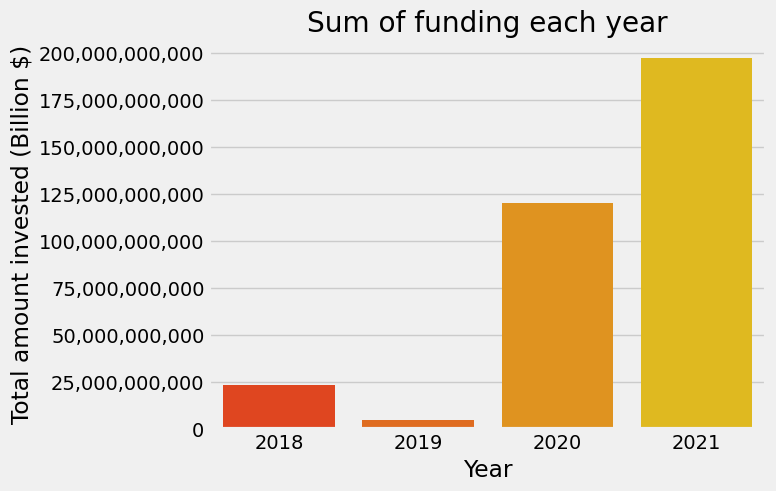

In [314]:
plot=sns.barplot(y=q1['Amount($)'], x=q1['Year'], palette='autumn')
plot.set(xlabel='Year', ylabel='Total amount invested (Billion $)')

def commas(x, pos):
    return f'{x:,.0f}'  # format with commas to improve readability

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))
plt.title('Sum of funding each year')

plt.show()

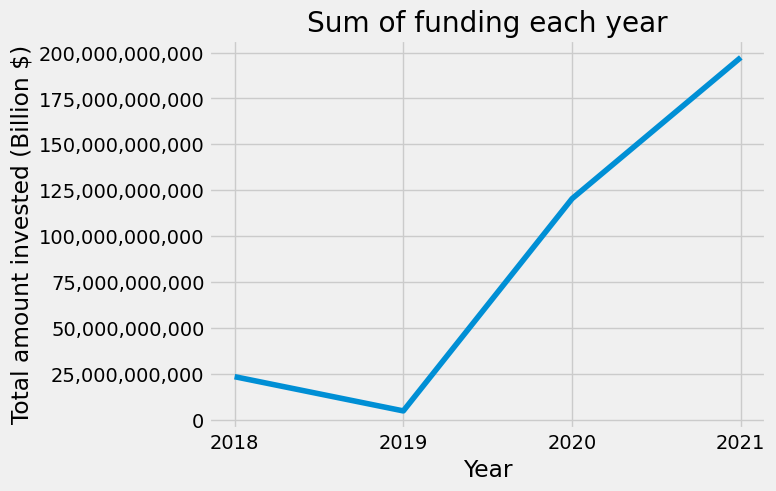

In [315]:
# Lets plot a line instead to show the trend line from 2018-2021

plot=sns.lineplot(y=q1['Amount($)'], x=q1['Year'])
plot.set(xlabel='Year', ylabel='Total amount invested (Billion $)')

def commas(x, pos):
    return f'{x:,.0f}'  # format with commas to improve readability

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))
plt.title('Sum of funding each year')

plt.show()

2. Which sector received the highest amount of funding collectively?

In [316]:
q2 = Final_Startup_Data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head().reset_index()
q2

,Sector,Amount($)
0,FinTech,"159,166,160,781.13"
1,Retail,"70,908,661,823.43"
2,EdTech,"11,074,612,640.27"
3,Tech,"5,406,938,134.85"
4,E-Commerce,"5,010,421,917.14"


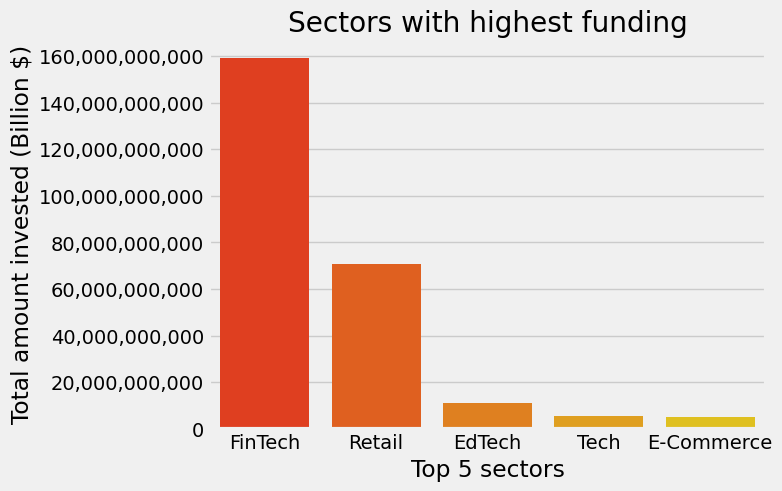

In [317]:
plot_2=sns.barplot(y=q2['Amount($)'], x=q2['Sector'], palette='autumn', )
plot_2.set(xlabel='Top 5 sectors', ylabel='Total amount invested (Billion $)')

def commas(x, pos):
    return f'{x:,.0f}'  # format with commas to improve readability

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))
plt.title('Sectors with highest funding')

plt.show()

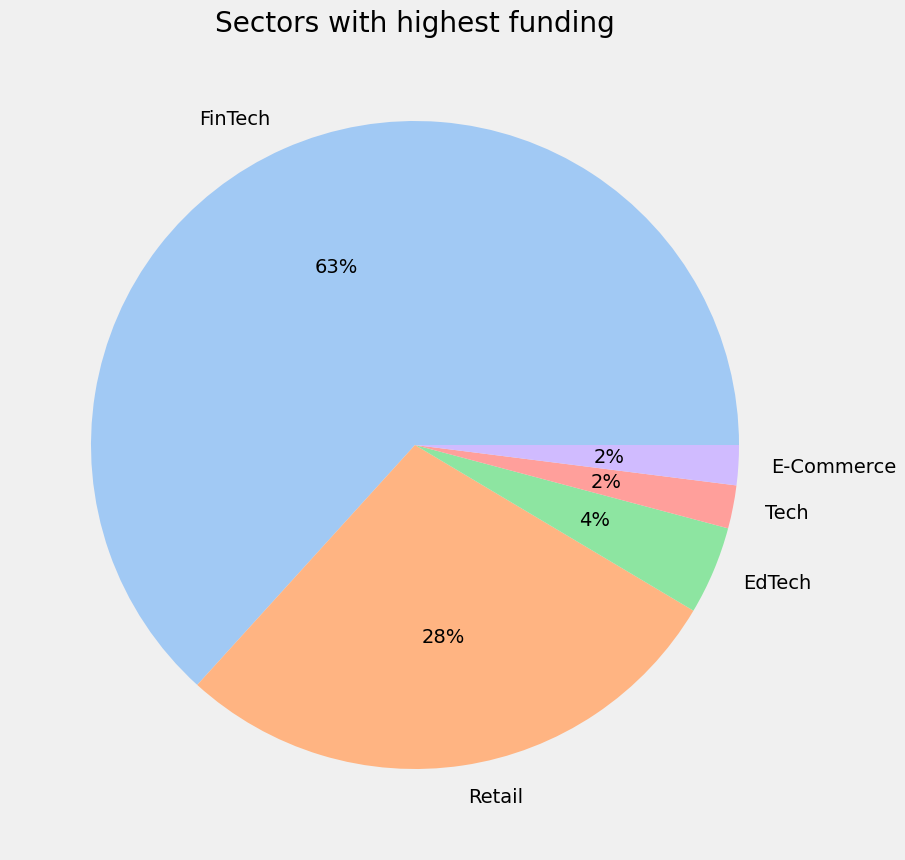

In [318]:
# Lets present this information on a pie chart to see the differences

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(12,10))
plt.title("Sectors with highest funding")
plt.style.use("fivethirtyeight")
plt.pie(q2['Amount($)'].iloc[:5], labels = q2['Sector'].iloc[:5], colors = colors, autopct='%.0f%%')
plt.show()

3. Which region has the most startups?

To answer this, we group the HeadQuarter, Amount and sector columns

In [319]:
final_data_region_most_startups = Final_Startup_Data[['HeadQuarter','Sector','Amount($)']].sort_values(by='Amount($)',ascending=False)

In [320]:
q3=Final_Startup_Data['HeadQuarter'].value_counts().sort_values(ascending=False).head(10)
q3

HeadQuarter
Bangalore    855
Mumbai       467
Gurugram     239
New Delhi    230
n/a          117
Chennai      105
Pune         104
Delhi         87
Noida         86
Gurgaon       79
Name: count, dtype: int64

Bangalore has the most startups. Let's look at the distribution of startups in Bangalore

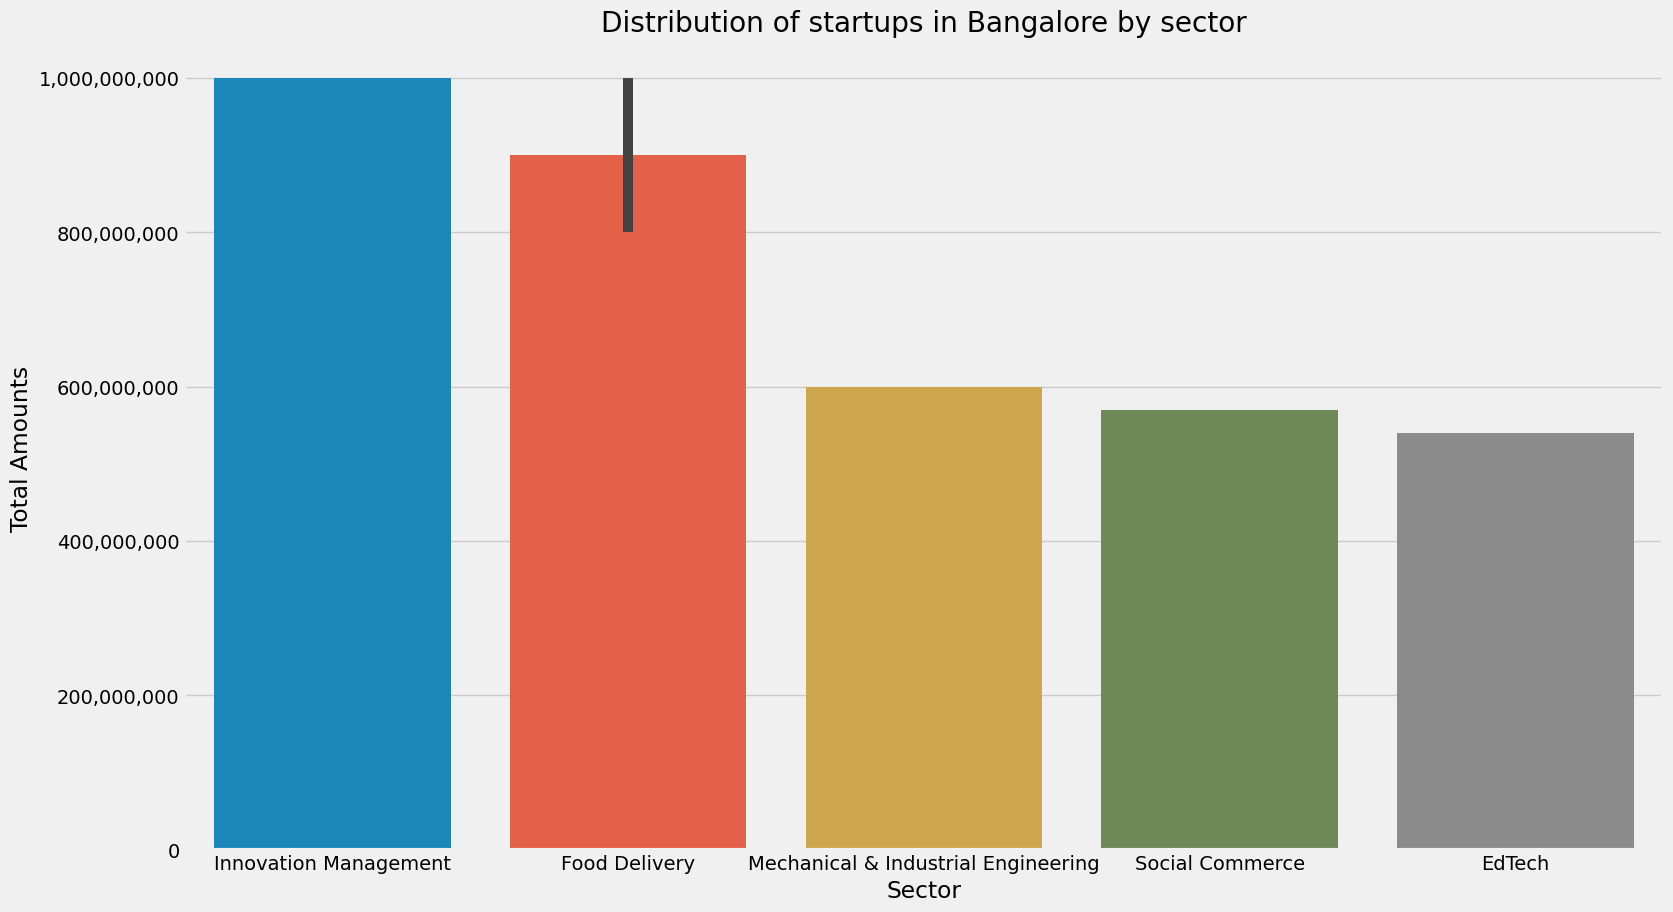

In [321]:
plot_3 = final_data_region_most_startups[final_data_region_most_startups["HeadQuarter"] =="Bangalore"]

plt.figure(figsize=(17,10))
plt.title("Distribution of startups in Bangalore by sector")
plt.style.use("fivethirtyeight")
sns.barplot(x="Sector",y="Amount($)",data=plot_3.sort_values(by="Amount($)",ascending=False).iloc[:6])

plt.ylabel("Total Amounts ")
plt.xlabel("Sector")

def commas(x, pos):
    return f'{x:,.0f}'  # format with commas to improve readability

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))

plt.show()

4. Which Region received the most investment


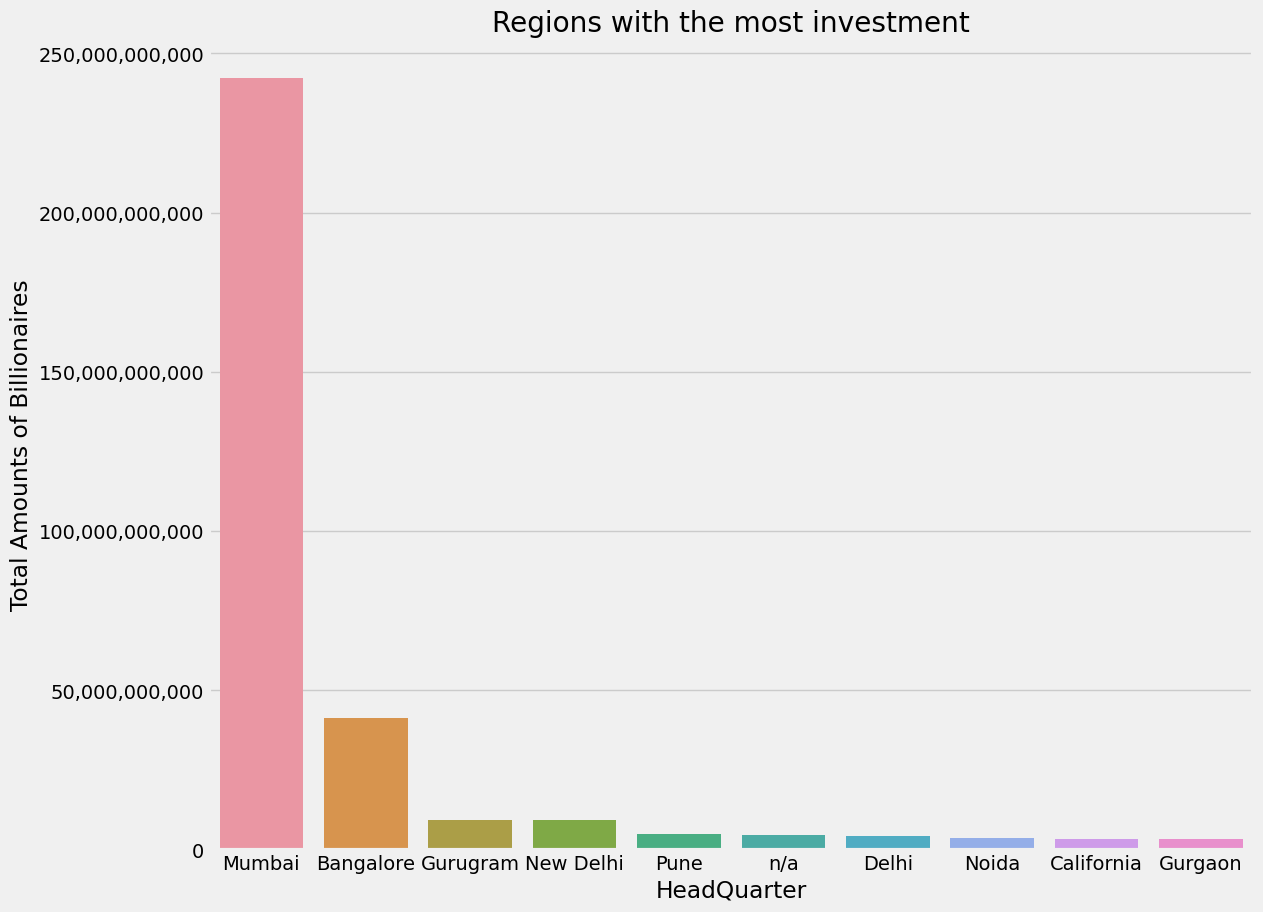

In [322]:
q4 = final_data_region_most_startups.groupby('HeadQuarter')['Amount($)'].sum().reset_index()

plt.figure(figsize=(12,10))
plt.title("Regions with the most investment")
plt.style.use("fivethirtyeight")
sns.barplot(x="HeadQuarter",y="Amount($)", data=q4.sort_values(by="Amount($)",ascending=False).iloc[:10])

plt.ylabel("Total Amounts of Billionaires")
plt.xlabel("HeadQuarter")

def commas(x, pos):
    return f'{x:,.0f}'  # format with commas to improve readability

# Set the custom formatter for the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(commas))

plt.show()

In [323]:
final_data_region_most_startups[final_data_region_most_startups["HeadQuarter"] =="Mumbai"].head()

,HeadQuarter,Sector,Amount($)
1737,Mumbai,FinTech,"150,000,000,000.00"
891,Mumbai,Retail,"70,000,000,000.00"
939,Mumbai,Multinational conglomerate company,"2,200,000,000.00"
2579,Mumbai,Sports,"840,000,000.00"
913,Mumbai,E-Commerce,"800,000,000.00"


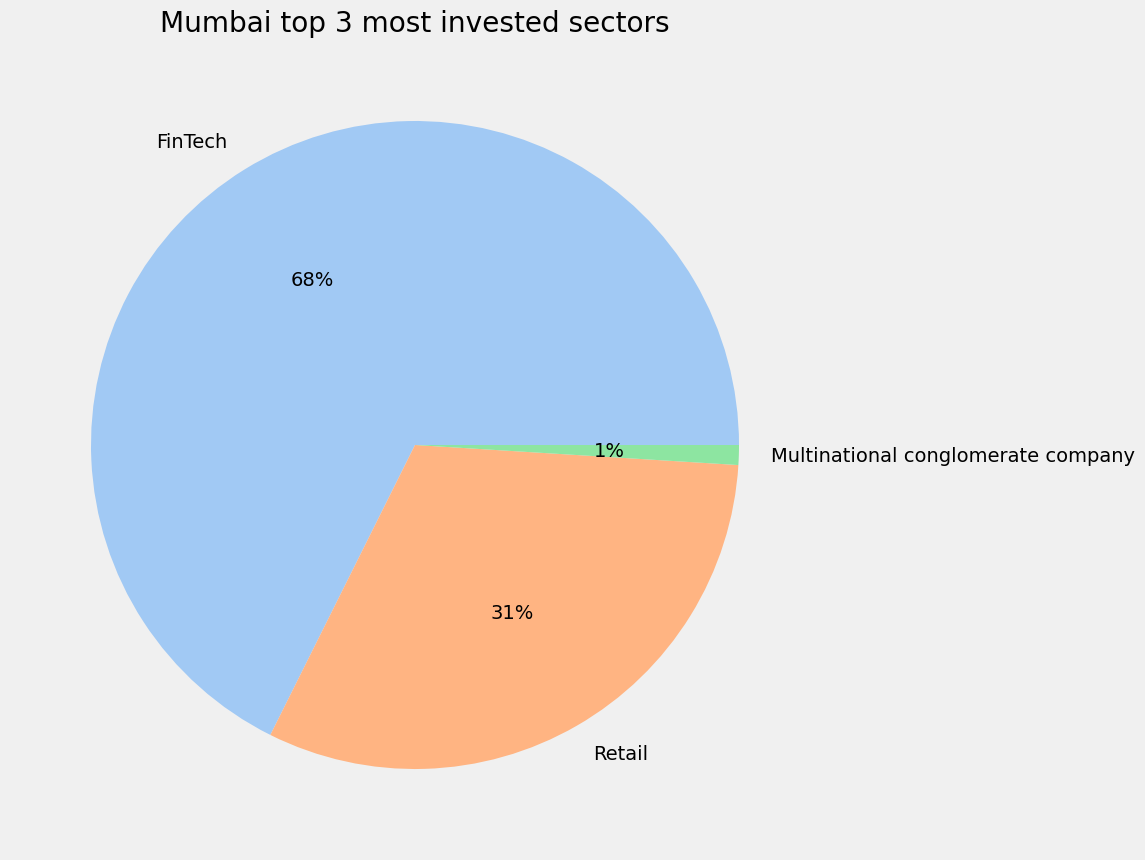

In [324]:
# Lets present this information on a pie chart to see the differences

highest_sector_investor =final_data_region_most_startups[final_data_region_most_startups["HeadQuarter"] =="Mumbai"]

mumbai_start=highest_sector_investor.groupby('Sector')['Amount($)'].sum().reset_index().sort_values(by="Amount($)",ascending=False).iloc[:3]
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(12,10))
plt.title("Mumbai top 3 most invested sectors")
plt.style.use("fivethirtyeight")
plt.pie(mumbai_start['Amount($)'], labels = mumbai_start['Sector'], colors = colors, autopct='%.0f%%')
plt.show()

Mumbai is the region with the highest amount invested, even though Bangalore has the highest number of startups.

In large part we have Fintech and Retail which represent respectively 68 and 31 percent.

5. Which sector received the lowest amount of funding collectively?

In [325]:
q5 = Final_Startup_Data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=True).head().reset_index()
q5

,Sector,Amount($)
0,Digital Marketing,"1,460.00"
1,Warehouse,"54,000.00"
2,Government,"100,000.00"
3,Milk startup,"100,000.00"
4,E-Sports,"100,000.00"


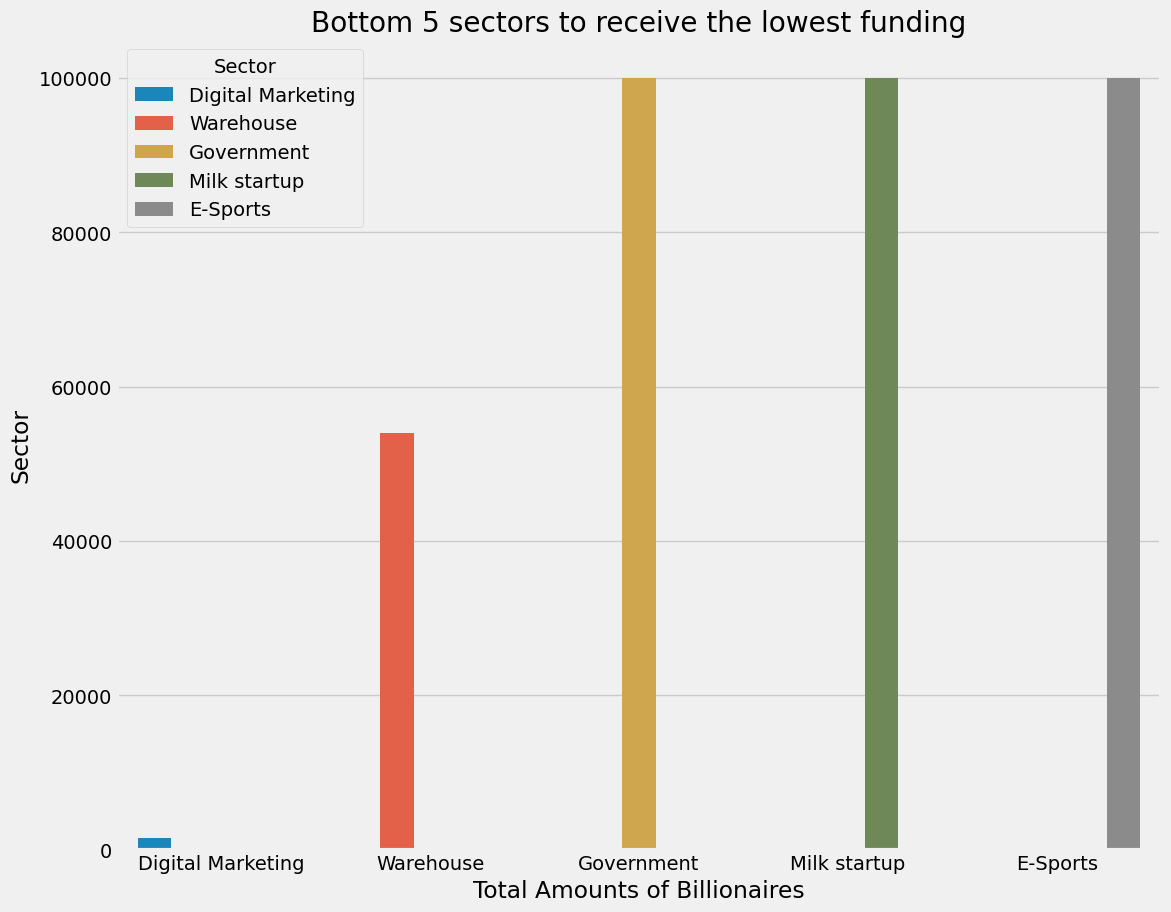

In [326]:
plt.figure(figsize=(12,10))
plt.title("Bottom 5 sectors to receive the lowest funding")
plt.style.use("fivethirtyeight")
sns.barplot(x="Sector",y="Amount($)",hue="Sector",data=q5)

plt.ylabel("Sector")
plt.xlabel("Total Amounts of Billionaires")
plt.show()

Digital Marketing is the sector which receives lowest amount collectivelly

6. What is the average amount of capital invested for the top 5 sectors?

In [327]:
# We already know the top sectors. Lets calculate the average by amount

sectors_to_filter = ['FinTech', 'Retail', 'EdTech', 'Tech company', 'E-commerce', 'Automotive', 'Multinational conglomerate company', 'Food Delivery', 'Hospitality']

average_sector = Final_Startup_Data[Final_Startup_Data['Sector'].isin(sectors_to_filter)].groupby('Sector').mean(numeric_only=True).sort_values(by='Amount($)', ascending=False).reset_index()
top_5_sectors = average_sector.nlargest(5, 'Amount($)')
top_5_sectors

,Sector,Amount($)
0,Retail,"2,445,126,269.77"
1,Multinational conglomerate company,"2,200,000,000.00"
2,FinTech,"616,923,103.80"
3,Food Delivery,"269,057,267.38"
4,Hospitality,"89,961,312.83"


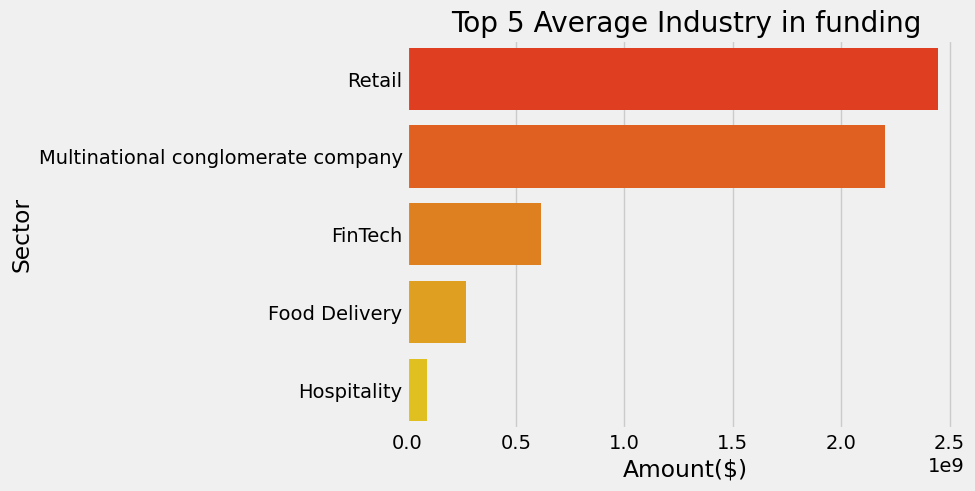

<Figure size 1500x1000 with 0 Axes>

In [328]:
sns.barplot(y=top_5_sectors['Sector'],x=top_5_sectors['Amount($)'],palette='autumn')
plt.title('Top 5 Average Industry in funding')
plt.figure(figsize=(15,10))
plt.show()

7. Top 10 companies with highest amount invested

In [329]:
top_companies=Final_Startup_Data.groupby('Company/Brand')['Amount($)'].sum().sort_values(ascending=False).head(10).reset_index()
top_companies

,Company/Brand,Amount($)
0,Alteria Capital,"150,000,000,000.00"
1,Reliance Retail Ventures Ltd,"70,000,000,000.00"
2,Snowflake,"3,000,000,000.00"
3,Reliance,"2,200,000,000.00"
4,Swiggy,"1,956,000,000.00"
5,VerSe Innovation,"1,550,000,000.00"
6,BYJU'S,"1,260,000,000.00"
7,Dream Sports,"1,240,000,000.00"
8,Zomato,"1,239,000,000.00"
9,Byju's,"983,793,941.14"


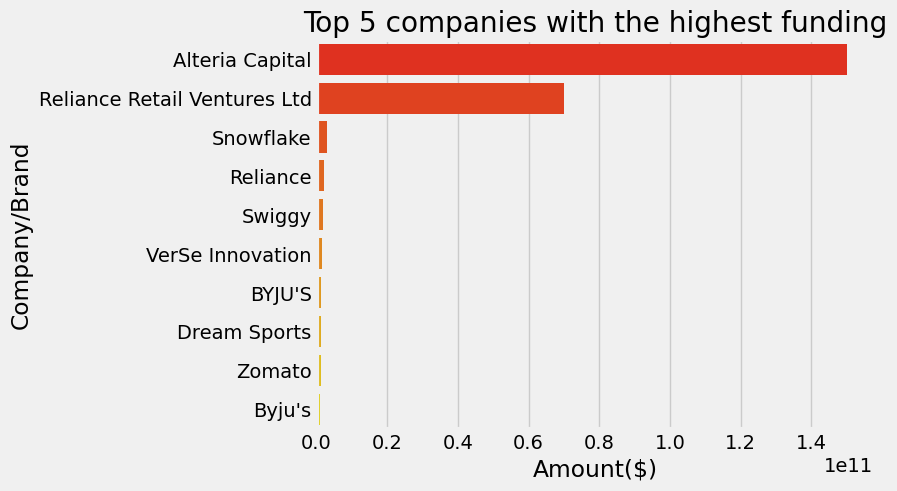

<Figure size 1500x1000 with 0 Axes>

In [330]:
sns.barplot(y=top_companies['Company/Brand'],x=top_companies['Amount($)'],palette='autumn')
plt.title('Top 5 companies with the highest funding')
plt.figure(figsize=(15,10))
plt.show()

#### Recommendations
-  Top sectors in indian startup ecosystem are Fintech, Retail, Edtech, Tech and E-commerce.
-  Most startups are in Bangalore but more investment is accessible in Mumbai.
-  The team should start the business in Mumbai in the Fintech space. There seems to be high demand for finance solutions.
-  Retail was popular during the pandemic as more people were probably shopping from home.